In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

In [2]:
# Import the ALLFED stle
plt.style.use(
    "https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle"
)

In [3]:
def μg_Iron_per_l_to_μmol_Iron_per_m3(μg_Fe_l):
    """
    Converts μg Iron per liter to μmol Iron per m³
    Arguments:
        μg_Fe_l: float: Iron concentration in μg per l
    Returns
        float: Iron concentration in μmol per m³
    """
    molar_mass_Fe = 55.845
    # Convert from μg to μmol
    μmol_Fe_l = μg_Fe_l * 1 / molar_mass_Fe
    # Convert from l to m³
    μmol_Fe_m3 = μmol_Fe_l * 1000
    return μmol_Fe_m3
    

# Iron limitation in Gracilaria species
https://link.springer.com/article/10.1007/s10811-006-9047-5
This article shows how Iron influences the growth of Gracilaria. At an iron concentration of 50 μg liter the growth is highest. Therefore, this is set as 0 % growth limitation by Iron. 

| Iron Concentration (μg per l) | Actual Growth Rate (% per day) |
|---|---|
| 0  | 0  |   
| 0.5  | 10  |  
| 5  | 11.25  |  
|  50 |  12.5 |  
|  500 | 11  |  


In [4]:
growth_df =  pd.DataFrame.from_dict({
    0:0, 
    0.5:(10 / 12.5),
    5:(11.25 / 12.5),
    50:(12.5 / 12.5),
    500:(11 / 12.5)
}, orient="index").reset_index()
growth_df.columns = ["Iron (μg per l)", "Relative Growth Rate (Fraction)"]
growth_df

,Iron (μg per l),Relative Growth Rate (Fraction)
0,0.0,0.00
1,0.5,0.80
2,5.0,0.90
3,50.0,1.00
4,500.0,0.88


In [5]:
growth_df["Iron (μmol per m3)"] = growth_df["Iron (μg per l)"].apply(μg_Iron_per_l_to_μmol_Iron_per_m3)
growth_df

,Iron (μg per l),Relative Growth Rate (Fraction),Iron (μmol per m3)
0,0.0,0.00,0.000000
1,0.5,0.80,8.953353
2,5.0,0.90,89.533530
3,50.0,1.00,895.335303
4,500.0,0.88,8953.353031


<AxesSubplot:xlabel='Iron (μmol per m3)'>

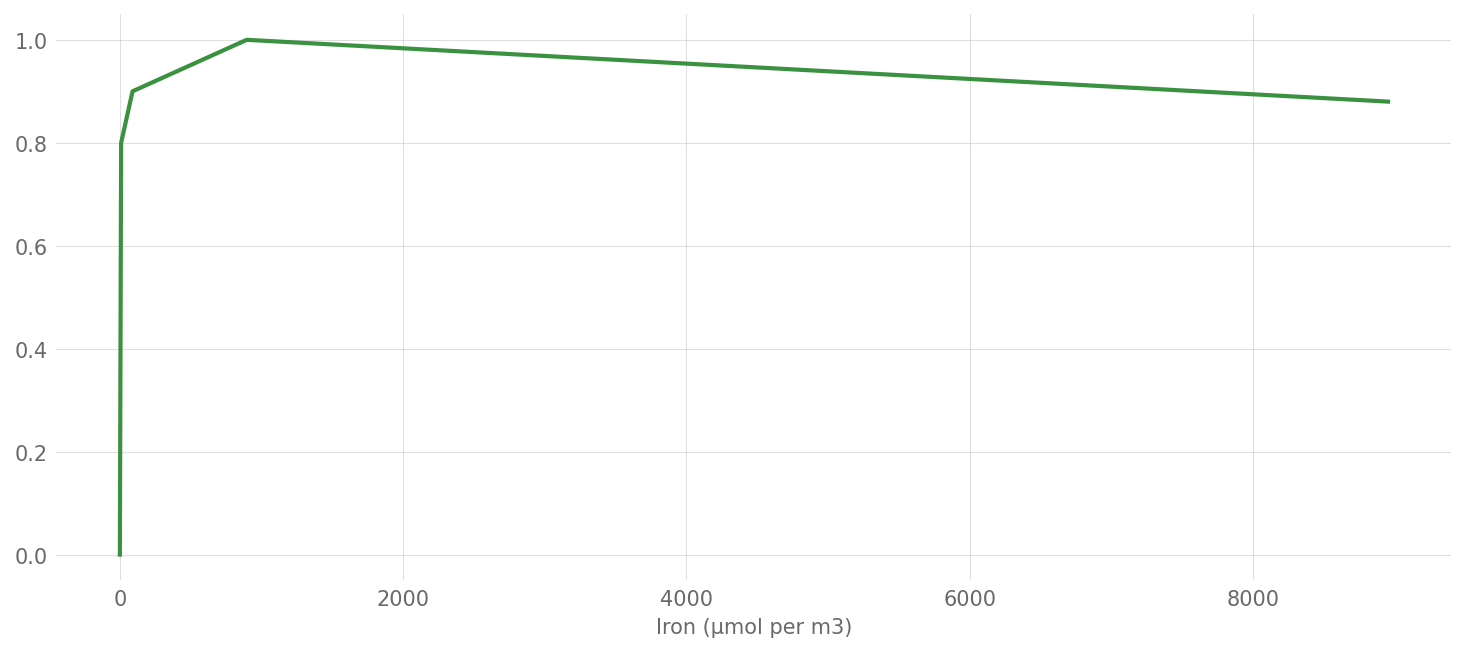

In [6]:
growth_df.plot(x="Iron (μmol per m3)", y= "Relative Growth Rate (Fraction)", legend=False)

# Fit this data to the same equation Scott used for all the other nutrients

In [7]:
def iron_subfactor(fe, k):
    """
    Used for fitting the Iron function to the data we have
    Arguments:
        fe: float: Iron concentration in μmol per m3
        k: float: empirical factor
    Returns
        float: the fe subfactor
    """
    fe_subfactor = fe / (k + fe)
    return fe_subfactor
    

In [8]:
parameters, covariance = curve_fit(iron_subfactor, growth_df["Iron (μmol per m3)"], growth_df["Relative Growth Rate (Fraction)"])
parameters

array([2.40039915])

In [9]:
k = parameters[0]
fe = np.arange(0,10000,0.1)
subfactor = iron_subfactor(fe, k)

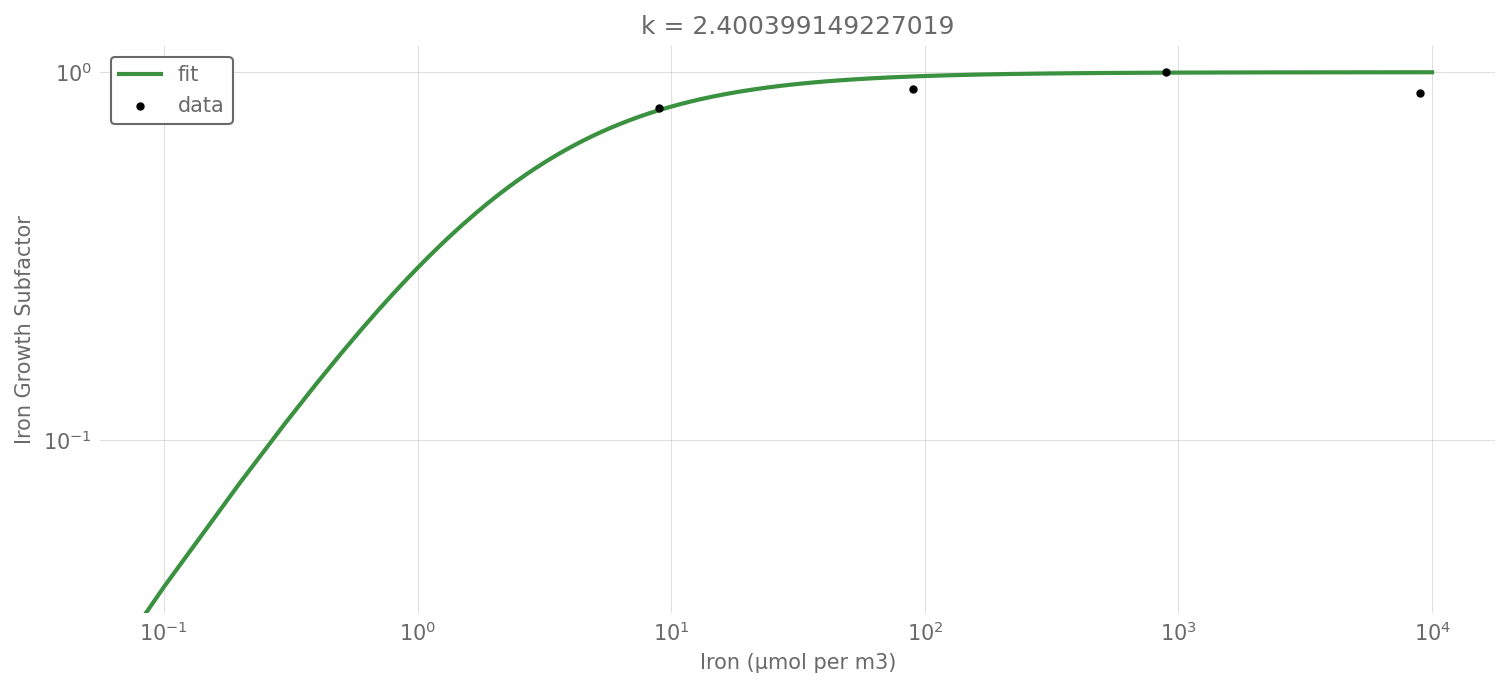

In [12]:
plt.plot(fe, subfactor, label="fit")
plt.scatter(growth_df["Iron (μmol per m3)"], growth_df["Relative Growth Rate (Fraction)"], zorder=5, color="black", label="data")
ax = plt.gca()
plt.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iron (μmol per m3)")
ax.set_ylabel("Iron Growth Subfactor")
ax.set_title("k = " + (str(k)));